# 拟合海拔和气温的关系

In [26]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

### 声明数据

In [32]:
X = np.arange(0,4001,500,)

# X必须是二维数组，reshape
X = X.reshape(-1,1)

# 温度
y = np.array([12.834044,10.190649,5.500229,2.854665,-0.706488,-4.065323,-7.127480,-10.058879,-13.206465])
display(X,y)

array([[   0],
       [ 500],
       [1000],
       [1500],
       [2000],
       [2500],
       [3000],
       [3500],
       [4000]])

array([ 12.834044,  10.190649,   5.500229,   2.854665,  -0.706488,
        -4.065323,  -7.12748 , -10.058879, -13.206465])

### 线性模型

In [33]:
# fit_intercept=True，拟合，训练，计算截距
model = LinearRegression()
model.fit(X,y)
print(model.coef_,model.intercept_)

[-0.00656953] 12.718507511111111


In [35]:
# fit_intercept=False，拟合，训练，计算截距
model = LinearRegression(fit_intercept=False)
model.fit(X,y)
print(model.coef_,model.intercept_)

[-0.00208065] 0.0


### 正规方程

#### X是一列求解的结果一个斜率

$W = (X^TX)^{-1}X^Ty$

In [34]:
np.set_printoptions(suppress=True)
np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

array([-0.00208065])

In [1]:
# 现在计算出的结果和调包设置无截距的结果相同
# 截距项需要添加一列1

#### X数据进行扩充，增加一列（表示截距）

In [36]:
X.shape

(9, 1)

In [37]:
X = np.concatenate([X,np.full(shape = (9,1),fill_value=1)],axis = 1)
X

array([[   0,    1],
       [ 500,    1],
       [1000,    1],
       [1500,    1],
       [2000,    1],
       [2500,    1],
       [3000,    1],
       [3500,    1],
       [4000,    1]])

In [44]:
np.set_printoptions(suppress=True)

np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

array([-0.00656953, 12.71850751])

In [40]:
# 计算不同海拔的温度，对应的函数
def fun(high):
    return -0.00656953 * high + 12.71850751

In [49]:
fun(6000)

-26.698672489999993

In [53]:
y

array([ 12.834044,  10.190649,   5.500229,   2.854665,  -0.706488,
        -4.065323,  -7.12748 , -10.058879, -13.206465])

In [55]:
X[:,0].reshape(-1)

array([   0,  500, 1000, 1500, 2000, 2500, 3000, 3500, 4000])

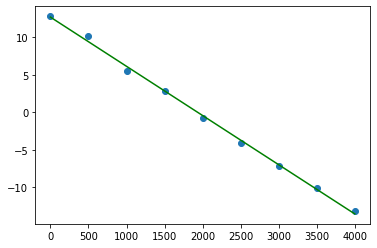

In [57]:
plt.scatter(X[:,0].reshape(-1),y)

x = np.linspace(0,4000,50)

y = fun(x)

plt.plot(x,y,color = 'green')